In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings("ignore")

### Load data

In [3]:
data = pd.read_csv(r"../data/parkinsons.csv")
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Diagnosis
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [4]:
data.shape

(195, 23)

In [5]:
X=data.iloc[:,0:22].values
y=data.iloc[:,-1].values

In [6]:
X_col_type = np.ones(X[0].shape)
X_col_type

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [7]:
from StratKFold import StratKFold
sk = StratKFold(n_splits=10)
sk.add_data(X,y)
folds = sk.get_folds()

[([50, 184, 172, 191, 187, 163, 76, 179, 112, 98, 92, 156, 67, 117, 16, 148, 164, 142, 135, 39, 193, 61, 192, 64, 46, 150, 69, 178, 72, 20, 74, 37, 144, 181, 40, 83, 38, 1, 121, 24, 183, 186, 63, 47, 174, 8, 134, 58, 70, 120, 132, 113, 151, 57, 133, 55, 59, 97, 29, 36, 31, 34, 169, 53, 45, 27, 119, 75, 4, 130, 81, 147, 107, 7, 66, 122, 158, 71, 128, 182, 52, 60, 42, 30, 194, 109, 136, 152, 9, 10, 102, 141, 19, 177, 123, 6, 28, 145, 116, 110, 173, 189, 168, 49, 62, 94, 3, 68, 54, 111, 140, 15, 17, 85, 105, 90, 87, 93, 18, 79, 48, 166, 32, 175, 44, 73, 157, 126, 143, 153, 114, 21, 149, 108, 89, 131, 5, 11, 12, 190, 185, 165, 167, 125, 115, 100, 0, 127, 159, 78, 91, 86, 88, 56, 129, 95, 104, 188, 176, 35, 65, 99, 137, 96, 2, 80, 22, 124, 13, 82, 162, 26, 14, 25, 160], [43, 33, 51, 170, 171, 180, 103, 41, 101, 106, 138, 84, 146, 155, 139, 118, 77, 23, 154, 161]), ([43, 33, 51, 170, 171, 180, 103, 41, 101, 106, 138, 84, 146, 155, 139, 118, 77, 23, 154, 161, 193, 61, 192, 64, 46, 150, 69, 17

### Random Forest

In [8]:
from RandomForestClassifier import RandomForestClassifier 
# rfc = RandomForestClassifier(5)

In [9]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
n_tree_values = [1,5,10,20,30,40,50]
for ntrees in n_tree_values:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=ntrees)
    mean_accuracy = 0
    mean_precision = 0
    mean_recall = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.785
f1 score:  0.7091831492255303
accuracy:  0.8266959064327484
f1 score:  0.7705719157785508
accuracy:  0.9028070175438596
f1 score:  0.8663775935437072
accuracy:  0.8933625730994151
f1 score:  0.8539030984268046
accuracy:  0.8975438596491229
f1 score:  0.8585019095925068
accuracy:  0.9028070175438596
f1 score:  0.8667242522013947
accuracy:  0.8872514619883042
f1 score:  0.8431343820850759


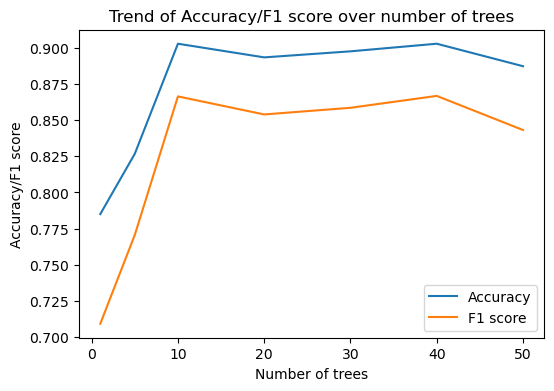

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(n_tree_values, accuracies, label="Accuracy")
plt.plot(n_tree_values, f1_scores, label="F1 score")
plt.xlabel('Number of trees')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of trees')
plt.legend()
plt.show()

In [11]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of trees: ", n_tree_values[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of trees: ", n_tree_values[max_index])

Optimal accuracy reached at number of trees:  10
Optimal F1 score reached at number of trees:  40


In [12]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
max_depths = [10,20,30,40,50]
for max_depth in max_depths:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=50, maximal_depth=max_depth)
    mean_accuracy = 0
    mean_precision = 0
    mean_recall = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_precision /= len(folds)
    mean_recall /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.9030701754385966
f1 score:  0.8667830523610707
accuracy:  0.9186257309941521
f1 score:  0.8882611820744944
accuracy:  0.9083625730994151
f1 score:  0.875478126597258
accuracy:  0.8822514619883043
f1 score:  0.835658987150123
accuracy:  0.9028070175438596
f1 score:  0.8665440720212144


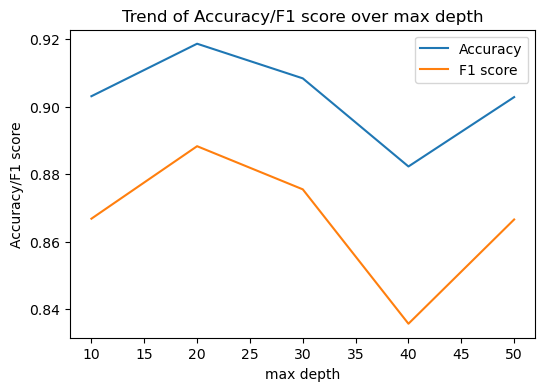

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(max_depths, accuracies, label="Accuracy")
plt.plot(max_depths, f1_scores, label="F1 score")
plt.xlabel('max depth')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over max depth')
plt.legend()
plt.show()

### KNN

In [14]:
from KNNClassifier import KNN_Classifier

In [15]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
from utils import Normalizer
scaler = Normalizer()

accuracies = []
f1_scores = []
n_neighbors = [1,5,10,20,30,40,50]
for n_neighbor in n_neighbors:
    knn = KNN_Classifier(n_neighbors=n_neighbor) 
    mean_accuracy = 0
    mean_precision = 0
    mean_recall = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_train = scaler.fit_transform(X_train)
        X_test = X[test_indices]
        y_test = y[test_indices]
        X_test = scaler.transform(X_test)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.9536549707602339
f1 score:  0.9458566961856707
accuracy:  0.9178070175438597
f1 score:  0.8914238046470766
accuracy:  0.9283333333333333
f1 score:  0.8992561878764633
accuracy:  0.8516959064327485
f1 score:  0.7682351152236507
accuracy:  0.8516959064327484
f1 score:  0.7689064725728203
accuracy:  0.8416959064327484
f1 score:  0.733108079211659
accuracy:  0.8050584795321638
f1 score:  0.6566296437168336


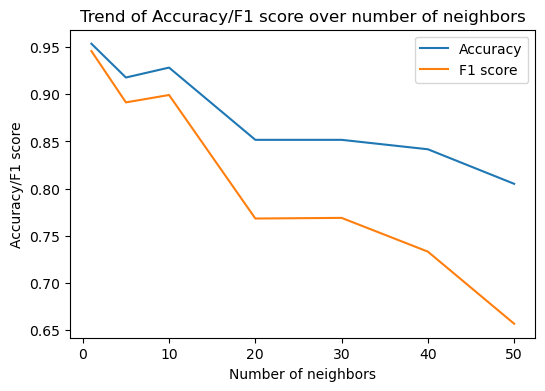

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(n_neighbors, accuracies, label="Accuracy")
plt.plot(n_neighbors, f1_scores, label="F1 score")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of neighbors')
plt.legend()
plt.show()

In [17]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of neighbors: ", n_neighbors[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of neighbors: ", n_neighbors[max_index])

Optimal accuracy reached at number of neighbors:  1
Optimal F1 score reached at number of neighbors:  1
